# Explanatory Data Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 📁Load Datasets

In [4]:
path_name = '../dataset/'

app_train_df = pd.read_csv(path_name + 'application_train.csv')
app_test_df = pd.read_csv(path_name + 'application_test.csv')

bureau_df = pd.read_csv(path_name + 'bureau.csv')
bureau_balance_df = pd.read_csv(path_name + 'bureau_balance.csv')

previous_app_df = pd.read_csv(path_name + 'previous_application.csv')
pos_cash_balance = pd.read_csv(path_name + 'POS_CASH_balance.csv')
installment_payment_df = pd.read_csv(path_name + 'installments_payments.csv')
credit_card_balance = pd.read_csv(path_name + 'credit_card_balance.csv')

## 📁`application_train.csv` (primary dataset for modeling)

In [16]:
app_train_df.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [17]:
pd.options.display.max_columns = None

app_train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### 🎯 Analysis target

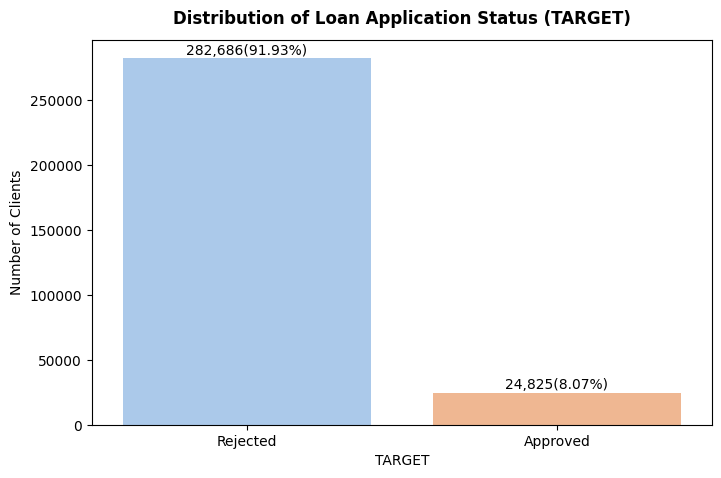

In [18]:
target_counts = app_train_df['TARGET'].value_counts()
target_percentage = app_train_df['TARGET'].value_counts(normalize=True) * 100

# Plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=target_counts.index, y=target_counts.values, palette='pastel')
plt.title('Distribution of Loan Application Status (TARGET)', fontsize=12, fontweight='bold', y=1.02)
plt.ylabel('Number of Clients')
plt.xticks([0, 1], ['Rejected', 'Approved'])

# Annotate the bars with counts and percentages
for i, (count, percentage) in enumerate(zip(target_counts, target_percentage)):
    ax.text(i, count + 500, f'{count:,}({percentage:.2f}%)', ha='center', va='bottom', fontsize=10)

plt.show()

🔍Insights:
- There is significant class imbalanced with 91.93% clients' application were rejected and only 8.07% client's application were approves.

💡Action:
- Use resampling techniques (oversampling or undersampling)

### 📊Descriptive analysis (Univariate Analysis)

- Group Numerical and Categorical Features

In [19]:
# Identify float columns with integer-like values
float_cols = app_train_df.select_dtypes(include=['float', 'int']).columns

# Filter columns where all non-null values are integers
int_like_cols = [col for col in float_cols if ((app_train_df[col].dropna() % 1 == 0)).all()]

print("Columns to convert to integer:", int_like_cols)

Columns to convert to integer: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FL

In [20]:
numerical_columns = app_train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns = [col for col in numerical_columns if col not in int_like_cols]

categorical_columns = int_like_cols + app_train_df.select_dtypes(include=['object', 'category']).columns.tolist()

categorical_columns.remove('SK_ID_CURR')
categorical_columns.remove('CNT_CHILDREN')
categorical_columns.remove('CNT_FAM_MEMBERS')

numerical_columns.append('CNT_CHILDREN')
numerical_columns.append('CNT_FAM_MEMBERS')

print("Numerical Columns:", numerical_columns)
print("\nCategorical Columns:", categorical_columns)

Numerical Columns: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_ME

In [21]:
# convert incompatible datatypes
app_train_df['CNT_FAM_MEMBERS'] = app_train_df['CNT_FAM_MEMBERS'].fillna(0).astype('int32')
app_train_df['AMT_REQ_CREDIT_BUREAU_MON'] = app_train_df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(0).astype('int64')
app_train_df['AMT_REQ_CREDIT_BUREAU_WEEK'] = app_train_df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(0).astype('int64')
app_train_df['AMT_REQ_CREDIT_BUREAU_QRT'] = app_train_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(0).astype('int64')
app_train_df['AMT_REQ_CREDIT_BUREAU_YEAR'] = app_train_df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(0).astype('int64')
app_train_df['OBS_30_CNT_SOCIAL_CIRCLE'] = app_train_df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(0).astype('int64')
app_train_df['OBS_60_CNT_SOCIAL_CIRCLE'] = app_train_df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(0).astype('int64')
app_train_df['DEF_30_CNT_SOCIAL_CIRCLE'] = app_train_df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(0).astype('int64')
app_train_df['DEF_60_CNT_SOCIAL_CIRCLE'] = app_train_df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0).astype('int64')
app_train_df['DEF_60_CNT_SOCIAL_CIRCLE'] = app_train_df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0).astype('int64')
app_train_df['DEF_60_CNT_SOCIAL_CIRCLE'] = app_train_df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0).astype('int64')
app_train_df['DEF_60_CNT_SOCIAL_CIRCLE'] = app_train_df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0).astype('int64')
app_train_df['DEF_60_CNT_SOCIAL_CIRCLE'] = app_train_df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(0).astype('int64')

# remove period-based features
period_features = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE']

for i in period_features:
    if i in categorical_columns:
        categorical_columns.remove(i)

- Summary Statistics

In [22]:
# Detect outliers using IQR method
Q1 = app_train_df[numerical_columns].quantile(0.25)
Q3 = app_train_df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers_IQR = ((app_train_df[numerical_columns] < (Q1 - 1.5 * IQR)) | (app_train_df[numerical_columns] > (Q3 + 1.5 * IQR)))

outliers_count_IQR = outliers_IQR.sum()

outliers_percentage = (outliers_count_IQR / app_train_df.shape[0]) * 100

num_desc_stats = app_train_df[numerical_columns].describe().transpose()

# Add additional statistics
num_desc_stats['skewness'] = app_train_df[numerical_columns].skew()
num_desc_stats['kurtosis'] = app_train_df[numerical_columns].kurtosis()
num_desc_stats['variance'] = app_train_df[numerical_columns].var()
#num_desc_stats['outlier_count'] = outliers_count_IQR
num_desc_stats['outliers (%)'] = outliers_percentage

num_desc_stats.head(5)


count           mean            std  \
AMT_INCOME_TOTAL            307511.0  168797.919297  237123.146279   
AMT_CREDIT                  307511.0  599025.999706  402490.776996   
AMT_ANNUITY                 307499.0   27108.573909   14493.737315   
AMT_GOODS_PRICE             307233.0  538396.207429  369446.460540   
REGION_POPULATION_RELATIVE  307511.0       0.020868       0.013831   

                                    min            25%           50%  \
AMT_INCOME_TOTAL            25650.00000  112500.000000  147150.00000   
AMT_CREDIT                  45000.00000  270000.000000  513531.00000   
AMT_ANNUITY                  1615.50000   16524.000000   24903.00000   
AMT_GOODS_PRICE             40500.00000  238500.000000  450000.00000   
REGION_POPULATION_RELATIVE      0.00029       0.010006       0.01885   

                                      75%           max    skewness  \
AMT_INCOME_TOTAL            202500.000000  1.170000e+08  391.559654   
AMT_CREDIT                  808650.000000  4.050000e+06    1.234778   
AMT_ANNUITY                  34596.000000  2.580255e+05    1.579777   
AMT_GOODS_PRICE             679500.000000  4.050000e+06    1.349000   
REGION_POPULATION_RELATIVE       0.028663  7.250800e-02    1.488009   

                                 kurtosis      variance  outliers (%)  
AMT_INCOME_TOTAL            191786.554381  5.622739e+10      4.564064  
AMT_CREDIT                       1.934041  1.619988e+11      2.133907  
AMT_ANNUITY                      7.707320  2.100684e+08      2.440238  
AMT_GOODS_PRICE                  2.431916  1.364907e+11      4.789422  
REGION_POPULATION_RELATIVE       3.260065  1.913043e-04      2.735512

In [23]:
# Define skewness thresholds
right_skewed_cols = num_desc_stats[num_desc_stats['skewness'] > 1].index.tolist()
left_skewed_cols = num_desc_stats[num_desc_stats['skewness'] < -1].index.tolist()

# Define low variance threshold
low_variance_cols = num_desc_stats[num_desc_stats['variance'] < 0.01].index.tolist()

# Display results
print("Right-skewed features:", right_skewed_cols)
print("Left-skewed features:", left_skewed_cols)
print("Low variance features:", low_variance_cols)

Right-skewed features: ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'CNT_CHILDREN']
Left-skewed features: ['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'YEARS_BEGINEXPLUATATION_MEDI']
Low variance features: ['REGION_POPULATION_RE

🔍Insights:
- Right-skewed:
- Left-skewed:
- Low variance (<0.01): `REGION_POPULATION_RELATIVE`, `BASEMENTAREA_AVG`, `YEARS_BEGINEXPLUATATION_AVG`, `COMMONAREA_AVG`, `LANDAREA_AVG`, `LIVINGAPARTMENTS_AVG`, `NONLIVINGAPARTMENTS_AVG`, `NONLIVINGAREA_AVG`, `BASEMENTAREA_MODE`, `YEARS_BEGINEXPLUATATION_MODE`, `COMMONAREA_MODE`, `LANDAREA_MODE`, `LIVINGAPARTMENTS_MODE`, `NONLIVINGAPARTMENTS_MODE`, `NONLIVINGAREA_MODE`, `BASEMENTAREA_MEDI`, `YEARS_BEGINEXPLUATATION_MEDI`, `COMMONAREA_MEDI`, `LANDAREA_MEDI`, `LIVINGAPARTMENTS_MEDI`, `NONLIVINGAPARTMENTS_MEDI`, `NONLIVINGAREA_MEDI`

💡Actions:
- Remove outliers using winsorization
- Do standardization and normalization 
- Drop features with low variance

- Distribution Plot Numerical Features (KDE)

c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

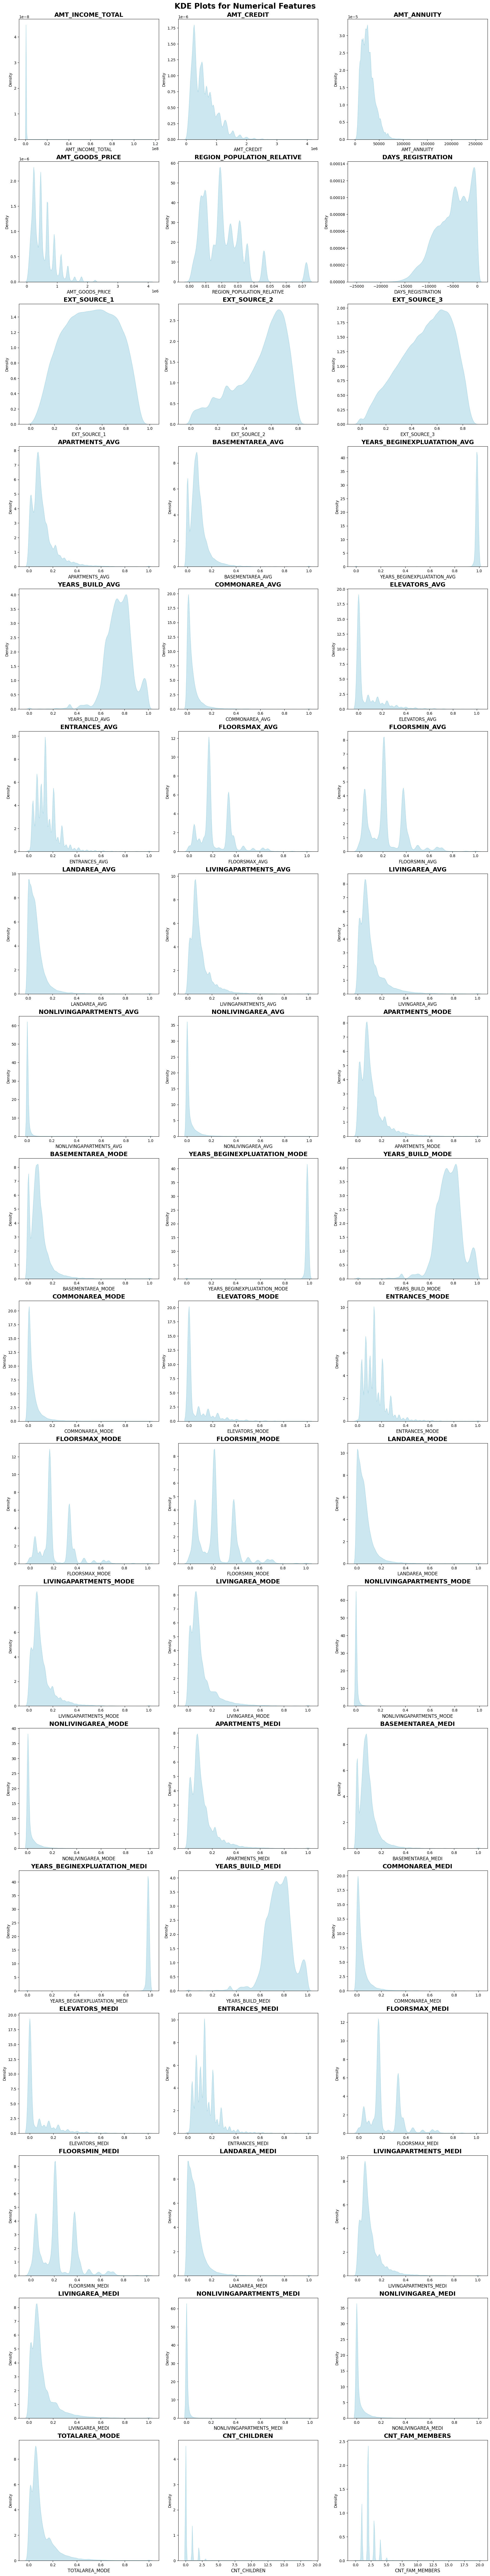

In [25]:
num_rows = (len(numerical_columns) + 1) // 2
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows), constrained_layout=True)
fig.suptitle("KDE Plots for Numerical Features", fontsize=20, fontweight='bold')
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.kdeplot(data=app_train_df, x=col, ax=axes[i], fill=True, color="lightblue", alpha=0.6)
    axes[i].set_title(f"{col}", fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.show()

- Distribution Plot Categorical Features

C:\Users\fizuf\AppData\Local\Temp\ipykernel_5136\2987411752.py:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


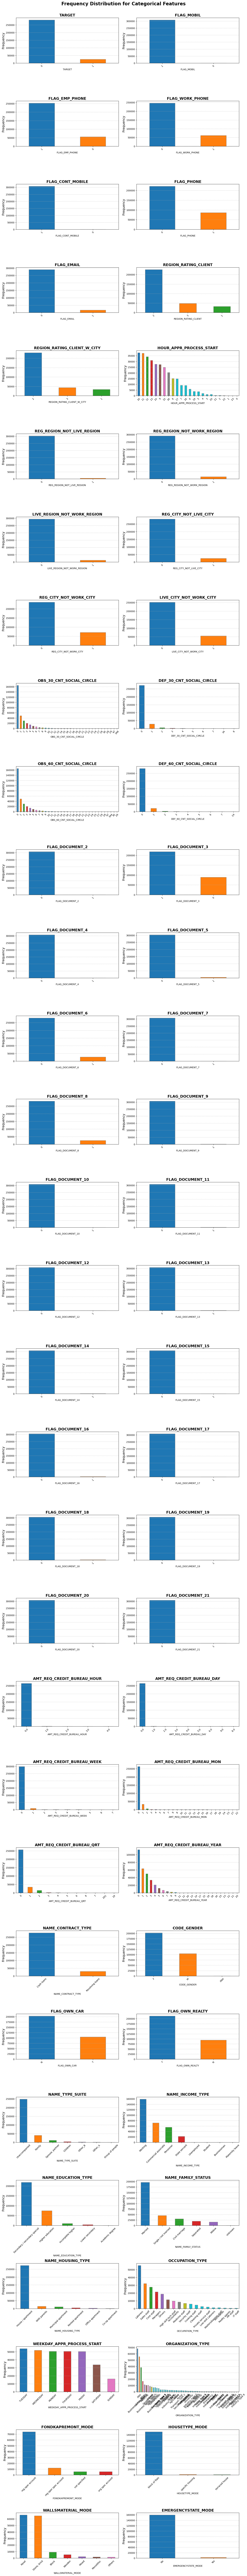

In [26]:
num_rows = (len(categorical_columns) + 1) // 2
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows), constrained_layout=True)

fig.suptitle("Frequency Distribution for Categorical Features", fontsize=20, fontweight='bold', y=1.001)

for i, column in enumerate(categorical_columns):
    row, col = divmod(i, 2) 
    ax = axes[row, col]
    
    value_counts = app_train_df[column].value_counts()
    colors = plt.cm.tab10(range(len(value_counts)))
    
    value_counts.plot(kind="bar", ax=ax, color=colors, edgecolor="grey")
    
    ax.set_title(f"{column}", fontsize=16, fontweight='bold')
    ax.set_ylabel("Frequency", fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.tick_params(axis='x', labelrotation=45)

for j in range(len(categorical_columns), num_rows * 2):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [29]:
summary_data = []

# Loop through each categorical column
for col in categorical_columns:
    # Calculate the value counts and percentages
    value_counts = app_train_df[col].value_counts()
    percentages = app_train_df[col].value_counts(normalize=True) * 100
    
    # Create a temporary DataFrame for this column's summary
    temp_df = pd.DataFrame({
        'Count': value_counts,
        'Percentage': percentages
    }).reset_index()
    
    # Rename the columns for better clarity
    temp_df.columns = [col, 'Count', 'Percentage']
    
    # Append the temporary summary to the list
    summary_data.append(temp_df)

# Concatenate all summaries into a single DataFrame
final_summary = pd.concat(summary_data, axis=1)

🔍Insights:
- Features with highly imbalanced category: `FLAG_MOBIL`, `FLAG_CONT_MOBILE`, `FLAG_EMAIL`, `REG_REGION_NOT_LIVE_REGION`, `REG_REGION_NOT_WORK_REGION`, `LIVE_REGION_NOT_WORK_REGION`, `REGION_CITY_NOT_LIVE_CITY`, `FLAG_DOCUMENT_2`, `FLAG_DOCUMENT_4`, `FLAG_DOCUMENT_7`, `FLAG_DOCUMENT_9`, `FLAG_DOCUMENT_10`, `FLAG_DOCUMENT_11`, `FLAG_DOCUMENT_12`, `FLAG_DOCUMENT_13`, `FLAG_DOCUMENT_14`, `FLAG_DOCUMENT_15`, `FLAG_DOCUMENT_16`, `FLAG_DOCUMENT_17`, `FLAG_DOCUMENT_18`, `FLAG_DOCUMENT_19`, `FLAG_DOCUMENT_20`, `FLAG_DOCUMENT_21`, `AMT_REQ_CREDIT_BUREAU_WEEK`, `AMT_REQ_CREDIT_BUREAU_MON`, `AMT_REQ_CREDIT_BUREAU_QRT`, `AMT_REQ_CREDIT_BUREAU_YEAR`, `HOUSETYPE_MODE`, `EMERGENCYSTATE_MODE`
- Features with high cardinality: `WALLSMATERIAL_MODE`, `ORGANIZATION_TYPE`, `WEEKDAY_APPR_PROCESS_START`, `AMT_REQ_CREDIT_BUREAU_YEAR`, `AMT_REQ_CREDIT_BUREAU_QRT`

💡Actions:
- Drop features with high cardinality

### 📈Correlation Analysis (Bivariate analysis)

In [74]:
low_variance_feats = ['REGION_POPULATION_RELATIVE', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'COMMONAREA_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'COMMONAREA_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'COMMONAREA_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI']
selected_features = []

for i in numerical_columns:
    if i not in low_variance_cols:
        selected_features.append(i)

print(f'selected features:{selected_features}')

selected features:['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_REGISTRATION', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'YEARS_BUILD_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LIVINGAREA_AVG', 'APARTMENTS_MODE', 'YEARS_BUILD_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LIVINGAREA_MODE', 'APARTMENTS_MEDI', 'YEARS_BUILD_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LIVINGAREA_MEDI', 'TOTALAREA_MODE']


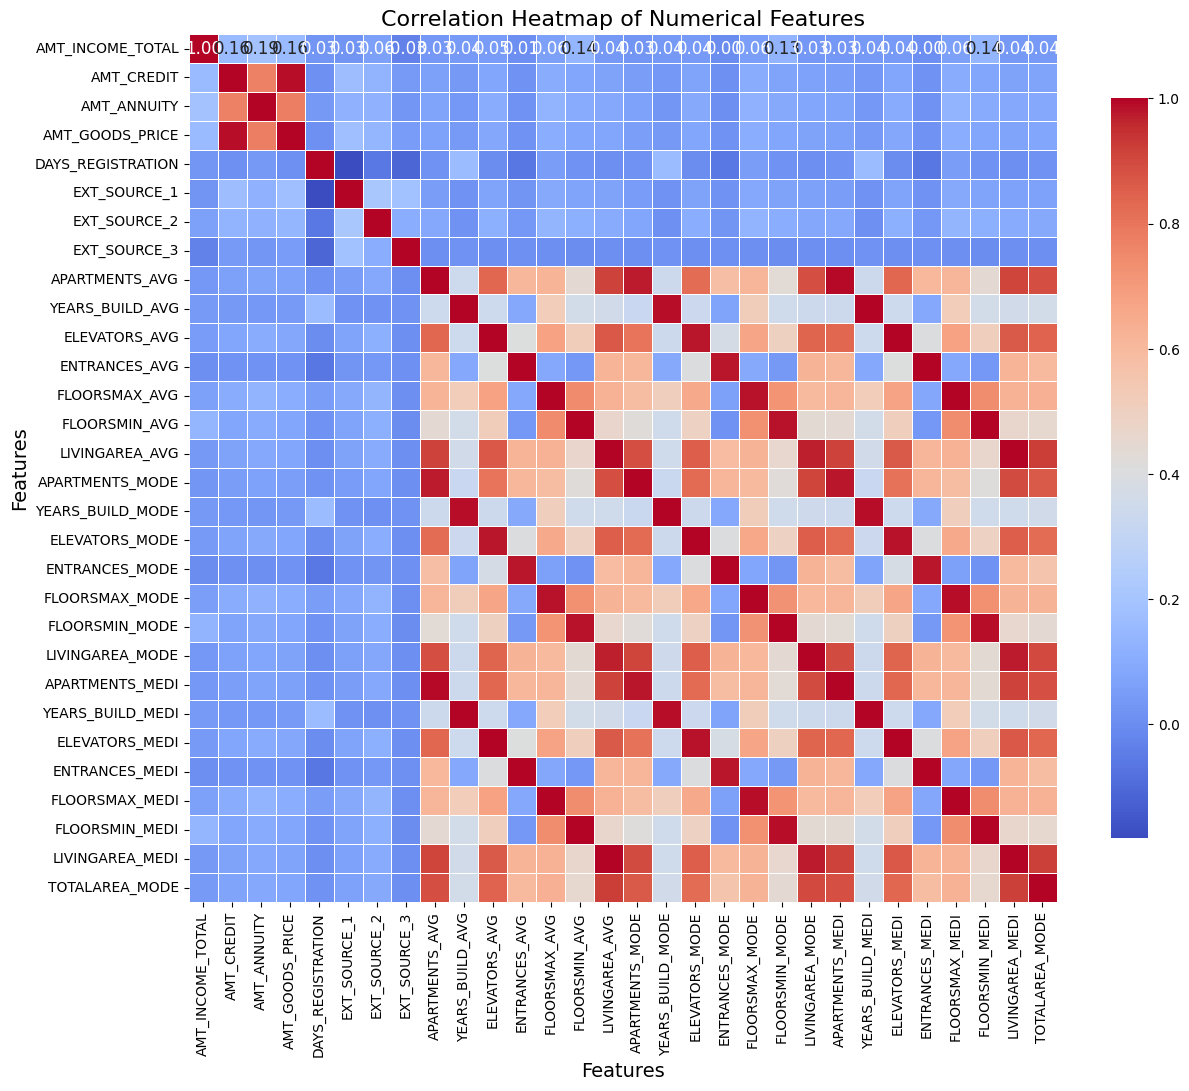

In [75]:
correlation_matrix = app_train_df[selected_features].corr()

correlation_matrix = correlation_matrix[selected_features].fillna(0)

plt.figure(figsize=(14, 12)) 
sns.heatmap(
    correlation_matrix, 
    annot=True,            
    cmap='coolwarm',       
    fmt=".2f",             
    annot_kws={'size': 12},  
    cbar_kws={'shrink': 0.8},  
    linewidths=0.5,        
    square=True,           
    xticklabels=correlation_matrix.columns,  
    yticklabels=correlation_matrix.index,   
    cbar=True
)

plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)

plt.show()

🔍Insights:
- High correlation features: (`AMT_GOOD_PRICE`, `AMT_CREDIT`), (`AMT_CREDIT`, `AMT_ANNUITY`), (`AMT_GOOD_PRICE`, `AMT_ANNUITY`), (`ELEVATOR_AVG`, `APARTMENTS_AVG`), (`LIVINGAREA_AVG`, `APARTMENTS_AVG`), (`ELEVATOR_MODE`, `APARTMENTS_AVG`), (`LIVINGAREA_MODE`, `APARTMENTS_AVG`), (`LIVINGAREA_MEDI`, `APARTMENTS_AVG`), (`TOTALAREA_MODE`, `APARTMENTS_AVG`), (`LIVINGAREA_AVG`, `ELEVATORS_AVG`), (`YEARS_BUILD_MODE`, `ELEVATORS_AVG`)

💡Actions:
- Select one feature among high correlation features.
- Create new features by combining several high correlated features.

## 📁`bureau.csv` and `bureau_balance.csv`

In [77]:
bureau_df.head(5)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [78]:
bureau_balance_df.head(5)

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

### Merge dataset

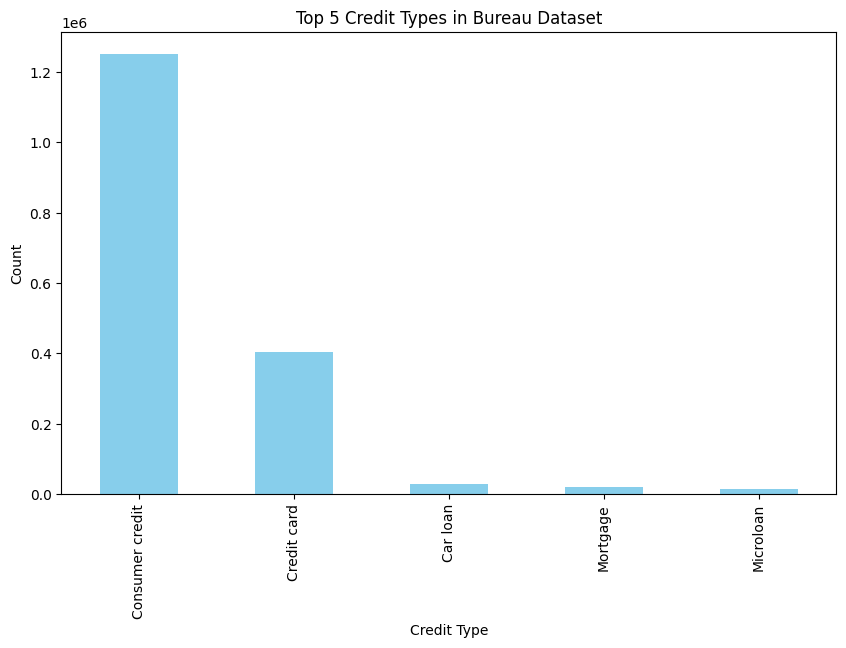

In [91]:
# Top 5 Credit Types
plt.figure(figsize=(10, 6))
credit_type_counts.plot(kind='bar', color='skyblue')
plt.title('Top 5 Credit Types in Bureau Dataset')
plt.xlabel('Credit Type')
plt.ylabel('Count')
plt.show()

C:\Users\fizuf\AppData\Local\Temp\ipykernel_20024\2549258896.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duration_overdue = bureau_df.groupby('CREDIT_DURATION')['AMT_CREDIT_SUM_OVERDUE'].mean().reset_index()
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


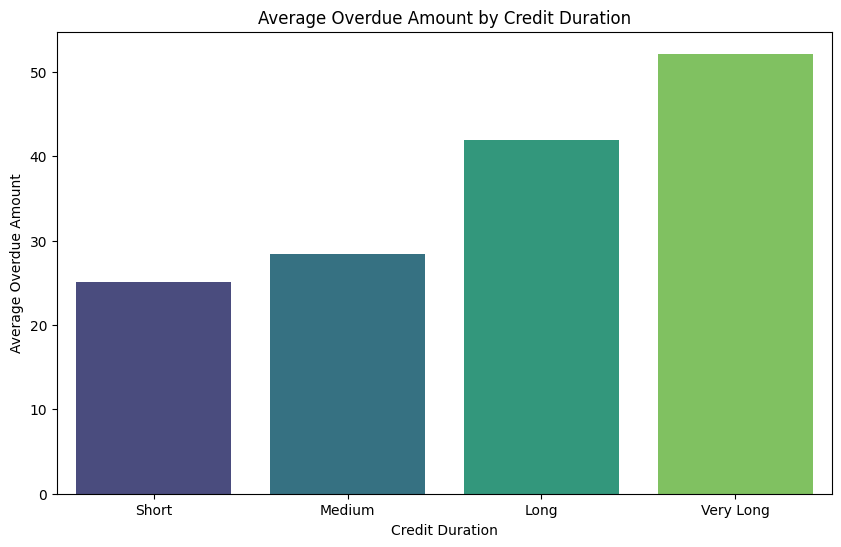

In [94]:
bureau_df = bureau_df.copy()
bureau_df['DAYS_CREDIT_ENDDATE'].replace(365243, np.nan, inplace=True)  # Handle placeholder value

# Create a duration category
bureau_df['CREDIT_DURATION'] = pd.qcut(bureau_df['DAYS_CREDIT_ENDDATE'].dropna(), q=4, labels=['Short', 'Medium', 'Long', 'Very Long'])

# Calculate average overdue amount per duration category
duration_overdue = bureau_df.groupby('CREDIT_DURATION')['AMT_CREDIT_SUM_OVERDUE'].mean().reset_index()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=duration_overdue, x='CREDIT_DURATION', y='AMT_CREDIT_SUM_OVERDUE', palette='viridis')
plt.title('Average Overdue Amount by Credit Duration')
plt.xlabel('Credit Duration')
plt.ylabel('Average Overdue Amount')
plt.show()

🔍Insights:
- Longer credit duration showed higher overdue amounts, indicating risk.

🧠Analysis:
- Longer-duration loans might create financial strain over time, increasing the likelihood of missed payments.
- Borrowers may face unforeseen financial difficulties during extended repayment periods.

💡Recommendation:
- **Stricter Risk Assessment for Long-Term Loans**: Introduce more stringent creditworthiness checks for applicants seeking long-term loans.
- **Dynamic Credit Limits**: Consider implementing dynamic repayment structures, like higher initial payments or balloon payments toward the end.
- **Periodic Financial Health Checks**: Regularly assess the borrower’s financial health during the loan tenure to detect early warning signs of default.
- **Offer Financial Planning Support**: Provide resources or consultations to help borrowers plan long-term repayments effectively.

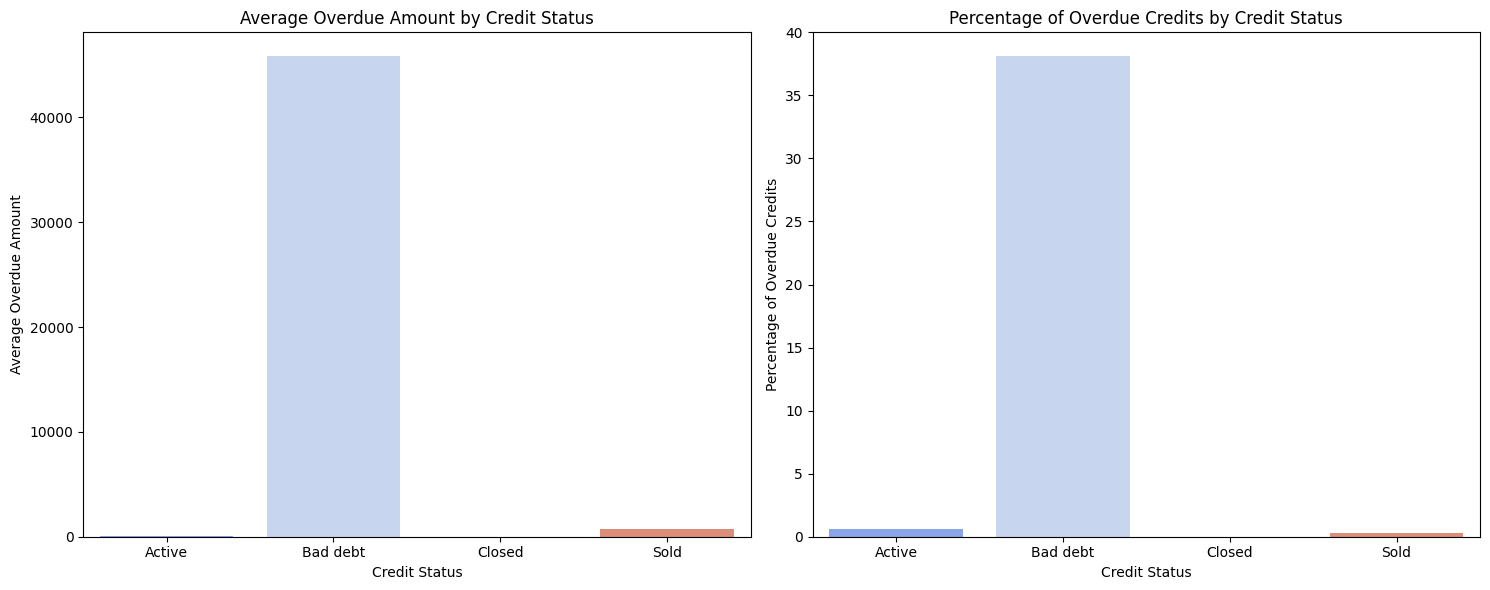

In [95]:
# Aggregate overdue information by CREDIT_ACTIVE status
credit_active_overdue = bureau_df.groupby('CREDIT_ACTIVE').agg(
    Total_Overdue=('AMT_CREDIT_SUM_OVERDUE', 'sum'),
    Avg_Overdue=('AMT_CREDIT_SUM_OVERDUE', 'mean'),
    Overdue_Count=('AMT_CREDIT_SUM_OVERDUE', lambda x: (x > 0).sum()),
    Total_Credits=('SK_ID_BUREAU', 'count')
).reset_index()

# Calculate percentage of overdue credits
credit_active_overdue['Overdue_Percentage'] = (credit_active_overdue['Overdue_Count'] / credit_active_overdue['Total_Credits']) * 100

# Visualization: Average Overdue Amount by Credit Status
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Avg Overdue Amount
sns.barplot(data=credit_active_overdue, x='CREDIT_ACTIVE', y='Avg_Overdue', palette='coolwarm', ax=ax[0])
ax[0].set_title('Average Overdue Amount by Credit Status')
ax[0].set_xlabel('Credit Status')
ax[0].set_ylabel('Average Overdue Amount')

# Overdue Percentage
sns.barplot(data=credit_active_overdue, x='CREDIT_ACTIVE', y='Overdue_Percentage', palette='coolwarm', ax=ax[1])
ax[1].set_title('Percentage of Overdue Credits by Credit Status')
ax[1].set_xlabel('Credit Status')
ax[1].set_ylabel('Percentage of Overdue Credits')

plt.tight_layout()
plt.show()

🔍Insights:
- Bad debt significantly has high percentage of overdue credit among other credit status (active, closed, sold).

🧠Analysis:
- Bad debts suggest loans where repayment is unlikely, and this group may already include non-performing assets.
- These accounts might have systemic issues, such as insufficient initial risk assessment or poorly structured repayment plans.

💡Recommendation:
- **Early Intervention Programs**: Proactively monitor signs of overdue payments and engage borrowers early to prevent defaults.
- **Restructure Loan Terms for At-Risk Accounts**: Offer renegotiated repayment terms to reduce overdue risk.
- **Focus on Active Loan Management**: Shift resources to actively monitor and manage at-risk borrowers before they fall into bad debt.
- **Limit Credit Access to High-Risk Borrowers**: Implement tighter credit controls for applicants with a history of overdue debts.

## 📁`previous_application.csv`

In [5]:
previous_app_df.head(5)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

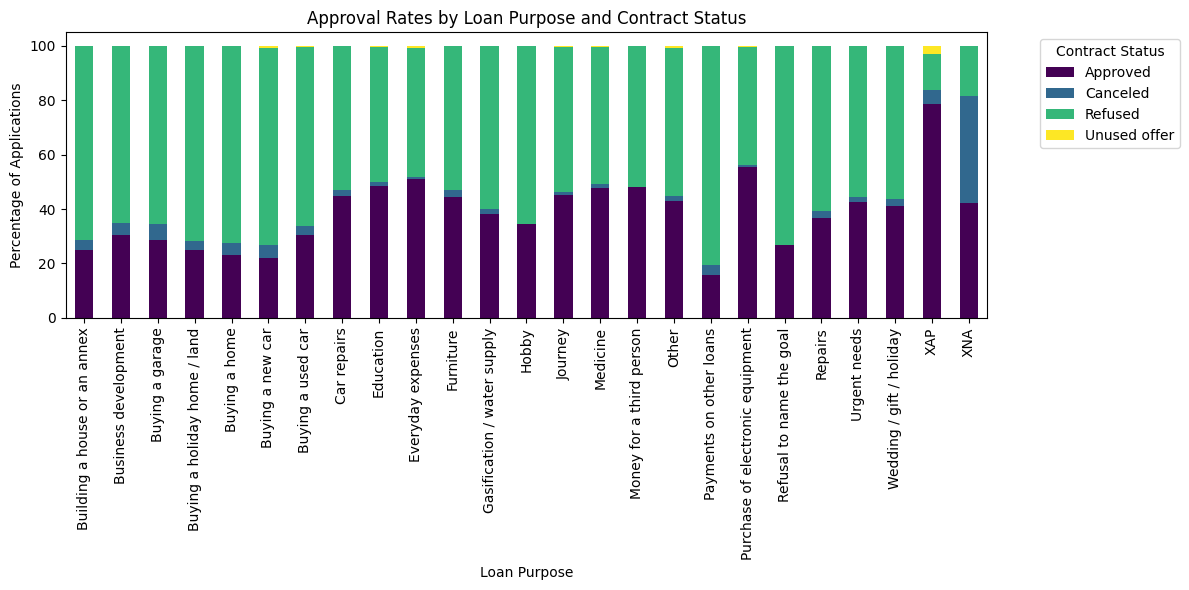

In [11]:
approval_by_purpose = previous_app_df.groupby(['NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS']).size().unstack(fill_value=0)

# Calculate the percentage distribution for each loan purpose
approval_by_purpose_percent = approval_by_purpose.div(approval_by_purpose.sum(axis=1), axis=0) * 100

approval_by_purpose_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='viridis'
)

plt.title('Approval Rates by Loan Purpose and Contract Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Percentage of Applications')
plt.legend(title='Contract Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

🔍Insights:
- Highest Approved Loan Purpose: XAP (likely an internal code for a specific loan product or purpose).
- Highest Refused Loan Purpose: Payment on Other Loans (indicating concerns about existing debt obligations).

💡Recommendations:
- For XAP Loans: Identify key factors contributing to their high approval rates and replicate these criteria across other loan purposes where feasible.
- For Payment on Other Loans: Conduct a deeper risk analysis to understand why these applications are frequently refused. Consider offering tailored financial counseling or restructuring options to improve approval rates.

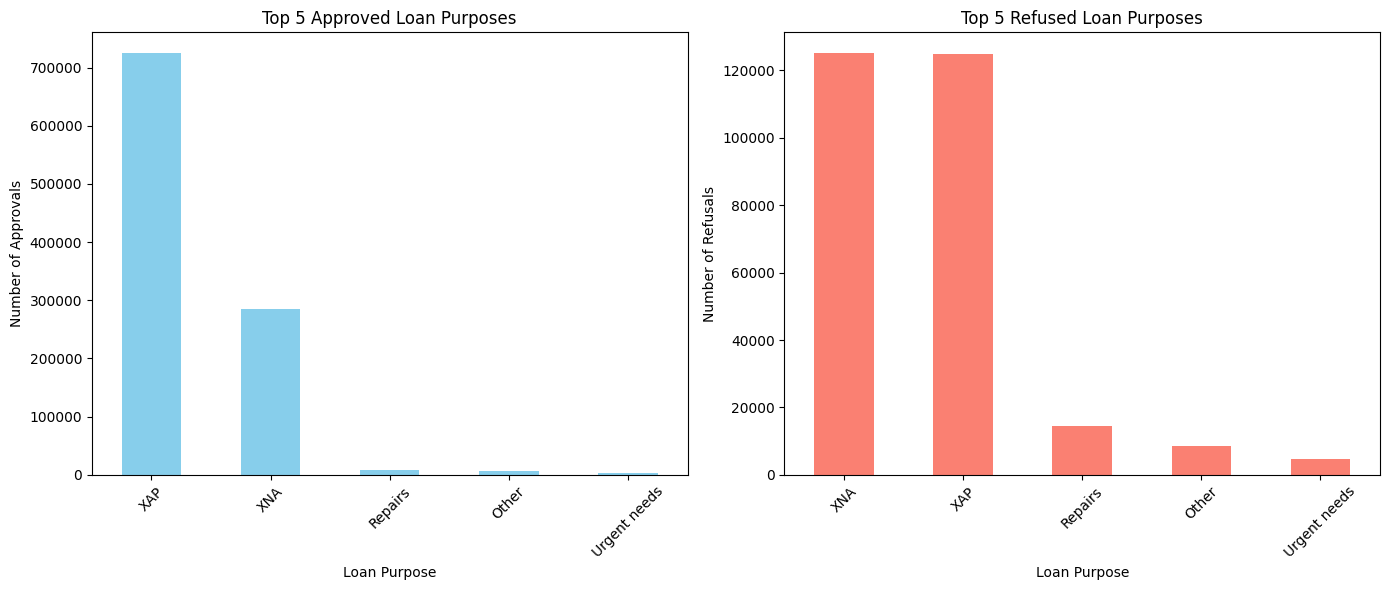

In [13]:
# Filter approved and refused applications
approved_loans = previous_app_df[previous_app_df['NAME_CONTRACT_STATUS'] == 'Approved']
refused_loans = previous_app_df[previous_app_df['NAME_CONTRACT_STATUS'] == 'Refused']

# Top 5 Approved Loan Purposes
top_approved = approved_loans['NAME_CASH_LOAN_PURPOSE'].value_counts().head(5)

# Top 5 Refused Loan Purposes
top_refused = refused_loans['NAME_CASH_LOAN_PURPOSE'].value_counts().head(5)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Approved Loans
top_approved.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Top 5 Approved Loan Purposes')
axes[0].set_ylabel('Number of Approvals')
axes[0].set_xlabel('Loan Purpose')
axes[0].tick_params(axis='x', rotation=45)

# Refused Loans
top_refused.plot(kind='bar', color='salmon', ax=axes[1])
axes[1].set_title('Top 5 Refused Loan Purposes')
axes[1].set_ylabel('Number of Refusals')
axes[1].set_xlabel('Loan Purpose')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

## 📁`POS_CASH_balance.csv`, `instalment_payments.csv`, `credit_card_balance.csv`

In [7]:
pos_cash_balance.head(5)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


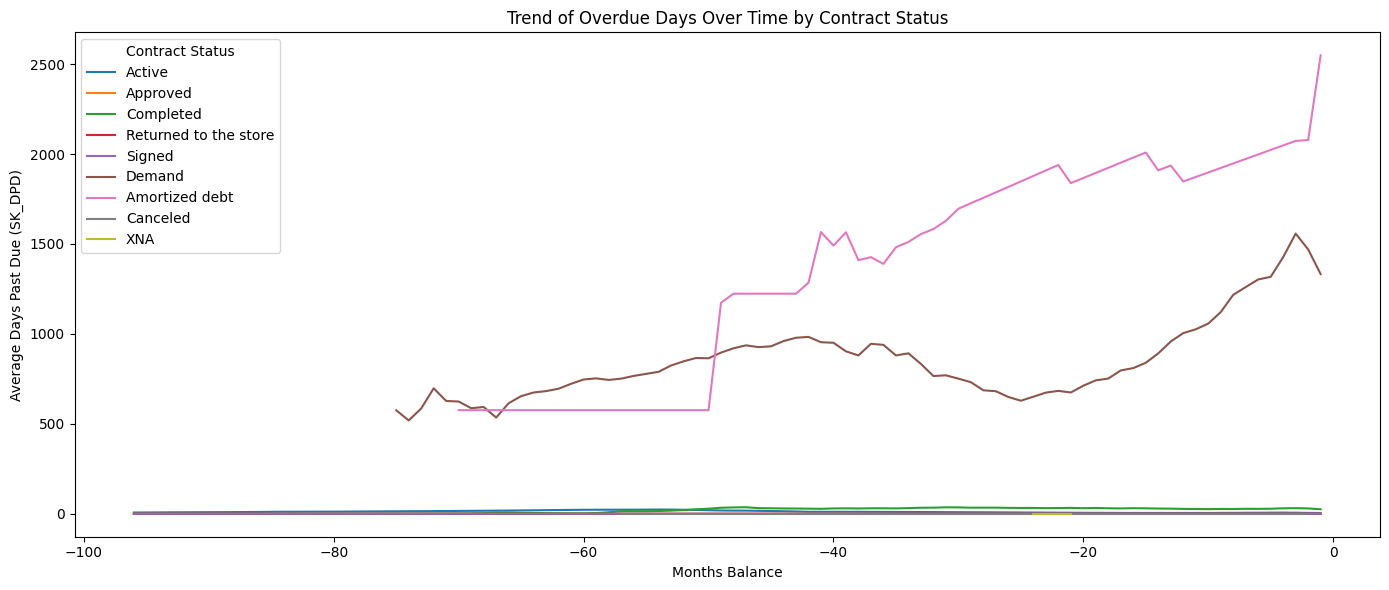

In [30]:
# Aggregate average SK_DPD over time per contract status
pos_cash_trend = pos_cash_balance.groupby(['MONTHS_BALANCE', 'NAME_CONTRACT_STATUS'])['SK_DPD'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=pos_cash_trend, x='MONTHS_BALANCE', y='SK_DPD', hue='NAME_CONTRACT_STATUS')
plt.title('Trend of Overdue Days Over Time by Contract Status')
plt.xlabel('Months Balance')
plt.ylabel('Average Days Past Due (SK_DPD)')
plt.legend(title='Contract Status')
plt.tight_layout()
plt.show()


🔍Insights:
- Amortized debt shows the largest increase in overdue days (SK_DPD) over time, followed by Demand loans.
- This indicates that amortized loans, which are repaid in fixed installments, may have higher overdue risks as time progresses compared to other loans.

💡Recommendation:
- Loan repayment plans for amortized debts may need closer monitoring and intervention (e.g., restructuring or financial counseling) to prevent defaults, especially in the later stages of repayment.

In [21]:
installment_payment_df.head(5)

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


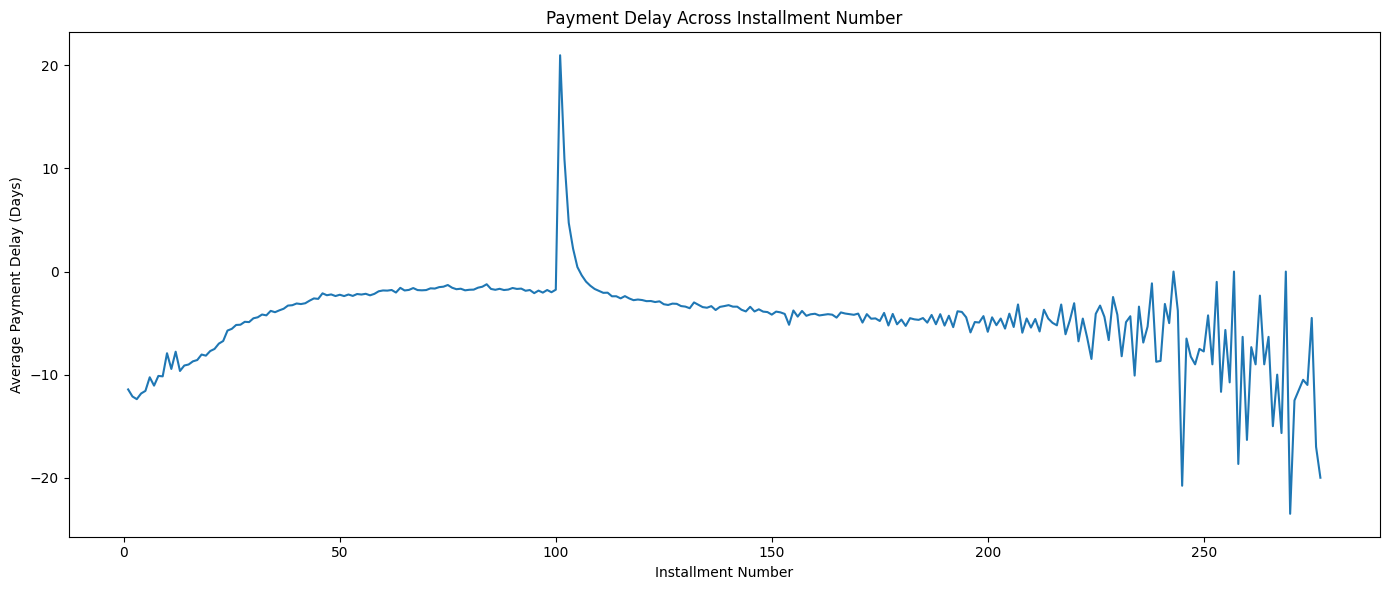

In [25]:
# Calculate payment delay
installment_payment_df['PAYMENT_DELAY'] = installment_payment_df['DAYS_ENTRY_PAYMENT'] - installment_payment_df['DAYS_INSTALMENT']

# Aggregate by NUM_INSTALMENT_NUMBER
payment_delay_trend = installment_payment_df.groupby('NUM_INSTALMENT_NUMBER')['PAYMENT_DELAY'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=payment_delay_trend, x='NUM_INSTALMENT_NUMBER', y='PAYMENT_DELAY')
plt.title('Payment Delay Across Installment Number')
plt.xlabel('Installment Number')
plt.ylabel('Average Payment Delay (Days)')
plt.tight_layout()
plt.show()


🔍Insights:
- At approximately 100 installments, there was a sudden and sharp increase in overdue days (DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT), peaking at around 20 days overdue before sharply decreasing.
- Between 200 and 250 installments, the trend became highly unstable, showing large fluctuations and even dipping into negative values, indicating early payments or irregular payment behavior.

🧠Analysis:
- This could indicate a systemic issue around the 100th installment, such as policy changes, payment restructuring, or financial strain experienced by borrowers at this stage.
- he fluctuations and negative days suggest inconsistent payment patterns. Borrowers may have been making early repayments or skipping scheduled payments during this period. It might also indicate system recording errors or irregular financial behavior.

💡Recommendation:
- Investigate the root cause of the spike at 100 installments to understand if it's tied to policy changes or borrower behavior.
- For the 200-250 installment range, further analysis is needed to determine if the issue stems from borrower financial stress or systematic data recording issues.

In [9]:
credit_card_balance.head(5)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fizuf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

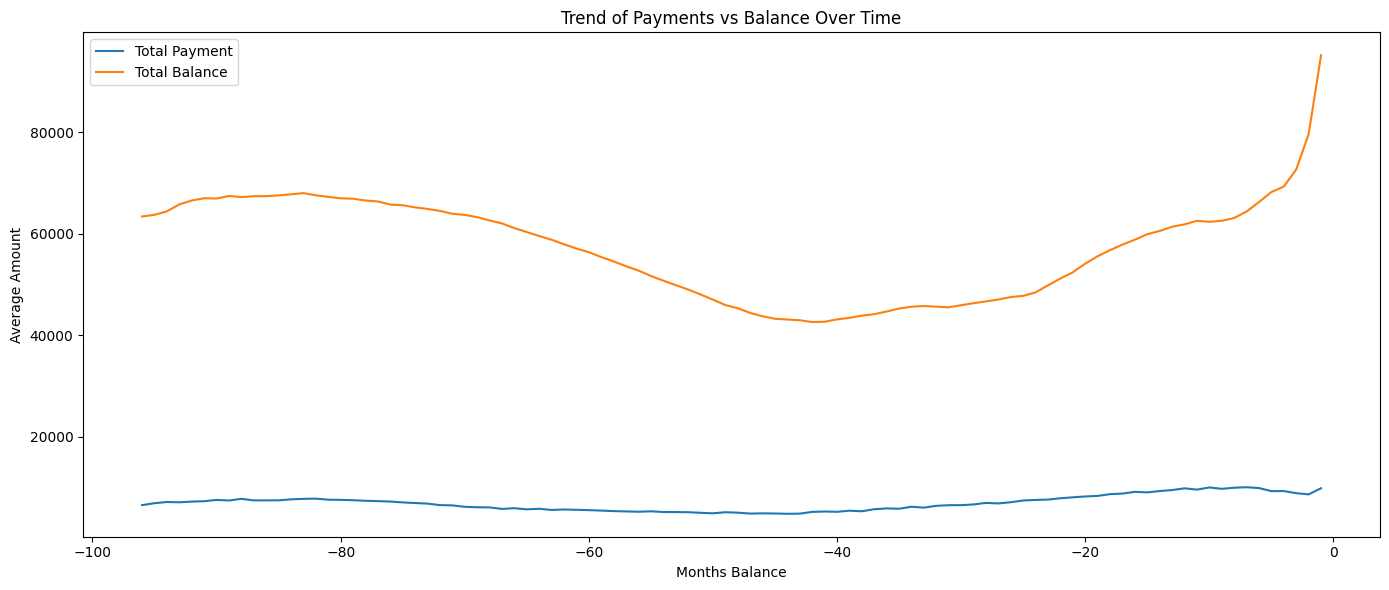

In [26]:
# Aggregate data per MONTHS_BALANCE
credit_card_trend = credit_card_balance.groupby('MONTHS_BALANCE').agg({
    'AMT_PAYMENT_TOTAL_CURRENT': 'mean',
    'AMT_BALANCE': 'mean'
}).reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=credit_card_trend, x='MONTHS_BALANCE', y='AMT_PAYMENT_TOTAL_CURRENT', label='Total Payment')
sns.lineplot(data=credit_card_trend, x='MONTHS_BALANCE', y='AMT_BALANCE', label='Total Balance')
plt.title('Trend of Payments vs Balance Over Time')
plt.xlabel('Months Balance')
plt.ylabel('Average Amount')
plt.legend()
plt.tight_layout()
plt.show()
